# GOAL 3: Theme investigation and audience interest analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

videosUS = pd.read_csv('US_youtube_trending_data.csv')
videosUK = pd.read_csv('GB_youtube_trending_data.csv')

#print(videosUS.head())
#print(videosUK.head())

In [2]:
categDict = {"1":"Film & Animation","2":"Autos & Vehicles","10":"Music","15":"Pets & Animals","17":"Sports",
             "18":"Short Movies","19":"Travel & Events","20":"Gaming","21":"Videoblogging","22":"People & Blogs",
             "23":"Comedy","24":"Entertainment","25":"News & Politics","26":"Howto & Style","27":"Education",
             "28":"Science & Technology","29":"Nonprofits & Activism","30":"Movies","31":"Anime/Animation",
             "32":"Action/Adventure","33":"Classics","34":"Comedy","35":"Documentary","36":"Drama","37":"Family",
             "38":"Foreign","39":"Horror","40":"Sci-Fi/Fantasy","41":"Thriller","42":"Shorts","43":"Shows","44":"Trailers"}

videosUS['category_name'] = videosUS['categoryId'].astype(str).map(categDict)
videosUK['category_name'] = videosUK['categoryId'].astype(str).map(categDict)

## US data analysis

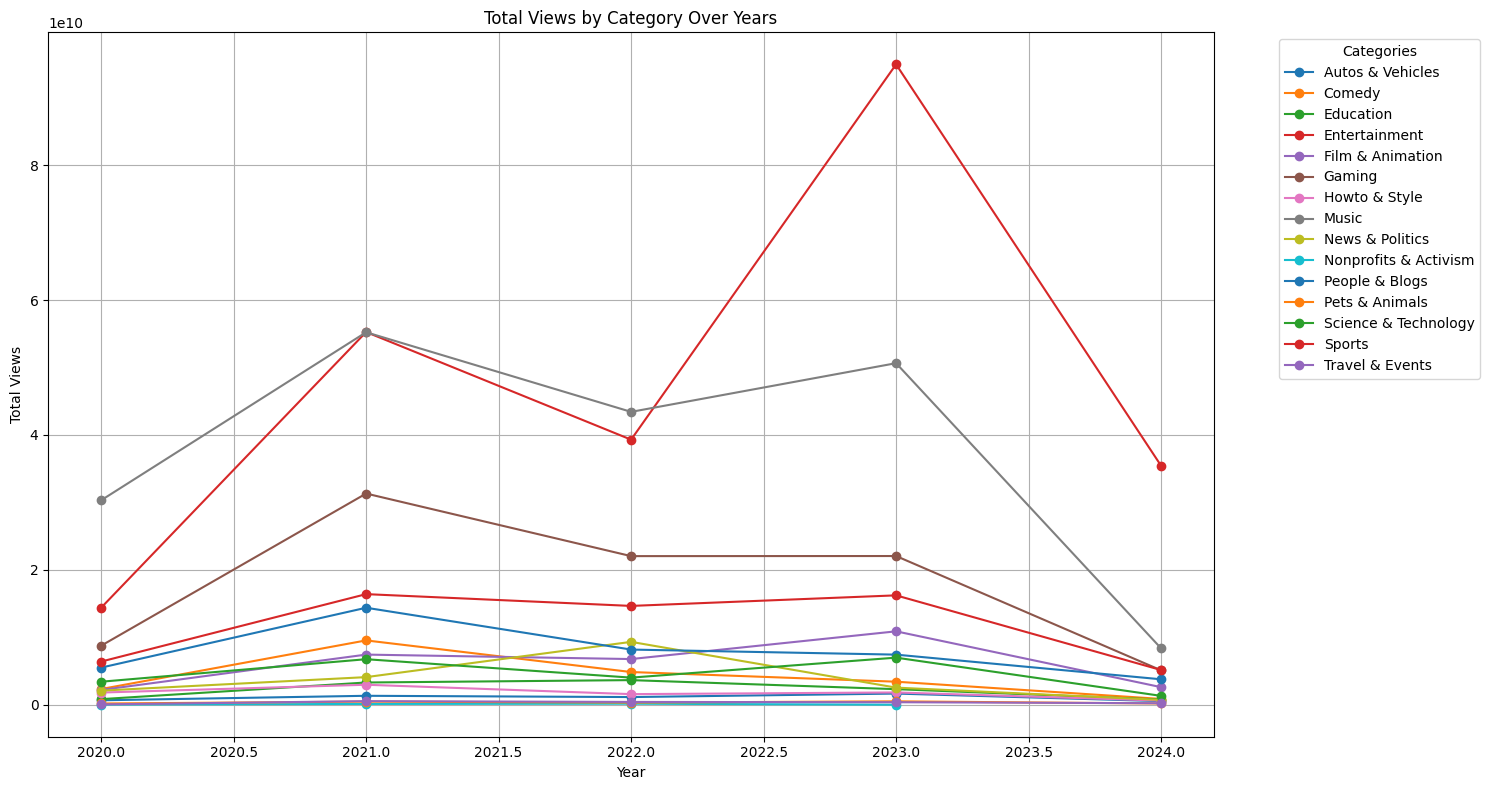

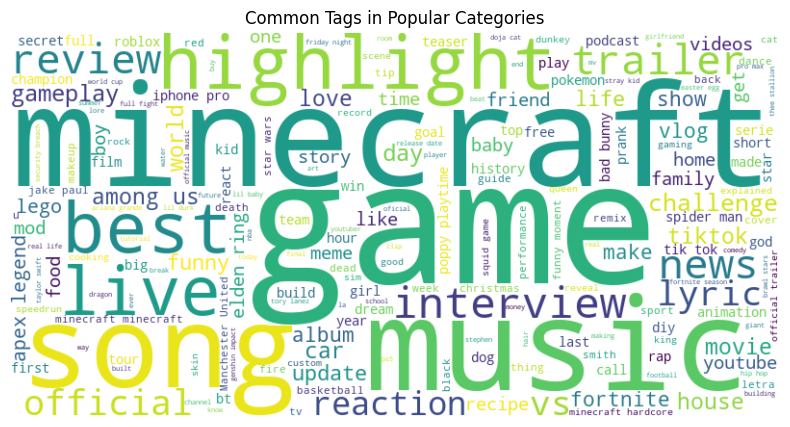

In [3]:
videosUS['trending_date'] = pd.to_datetime(videosUS['trending_date'], format='%y.%d.%m', errors='coerce')
videosUS['publishedAt'] = pd.to_datetime(videosUS['publishedAt'], errors='coerce')

# Extract Year and Month
videosUS['publish_year'] = videosUS['publishedAt'].dt.year
videosUS['publish_month'] = videosUS['publishedAt'].dt.month

# Aggregate Data
category_trends = videosUS.groupby(['publish_year', 'category_name']).agg(
    total_views=('view_count', 'sum'),
    total_likes=('likes', 'sum'),
    video_count=('video_id', 'count')
).reset_index()

# Plot Trends
pivot_data = category_trends.pivot(index='publish_year', columns='category_name', values='total_views')
pivot_data.plot(kind='line', figsize=(15, 8), marker='o')
plt.title('Total Views by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate Word Cloud for Popular Tags
banned_words = set(stopwords.words('english'))
banned_words.update({"new", "video", "V"})
videosUS['tags'] = videosUS['tags'].fillna('')  # Replace NaN with an empty string

popular_tags = videosUS['tags'].str.split('|').explode()
popular_tags = popular_tags[popular_tags != 'None']
popular_tags = popular_tags.str.strip()
popular_tags = " ".join(popular_tags.drop_duplicates())

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=banned_words).generate(popular_tags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Tags in Popular Categories')
plt.show()

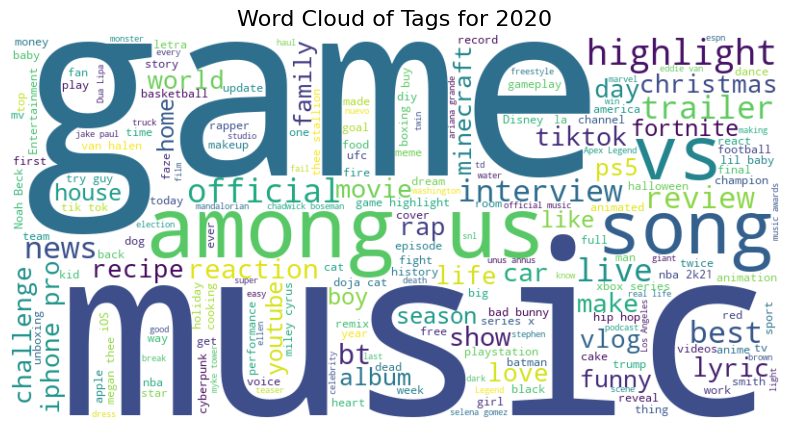

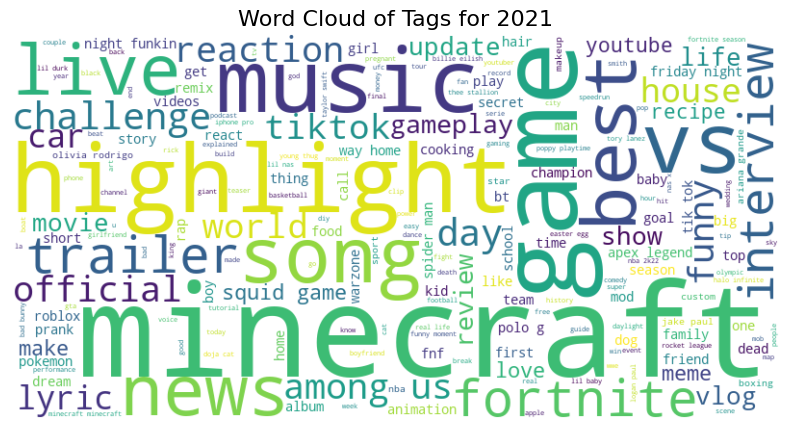

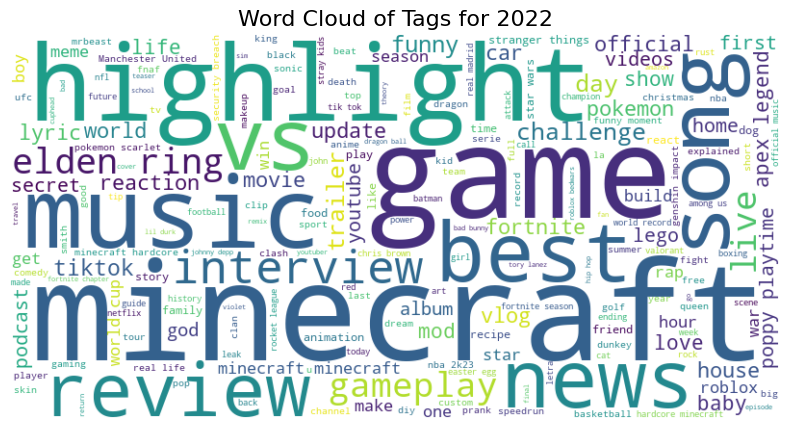

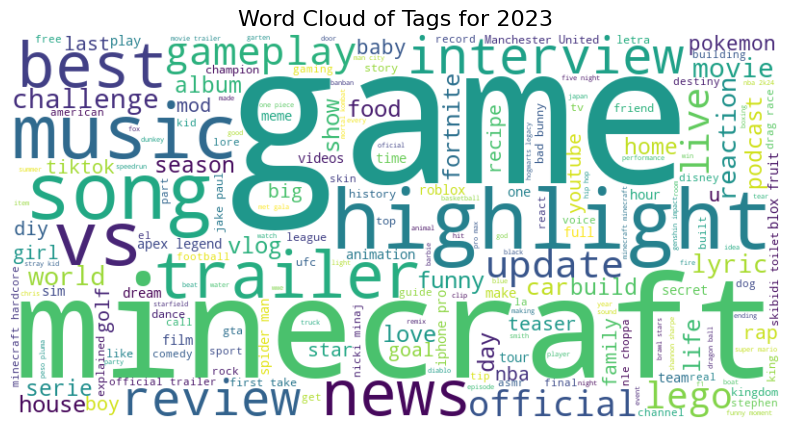

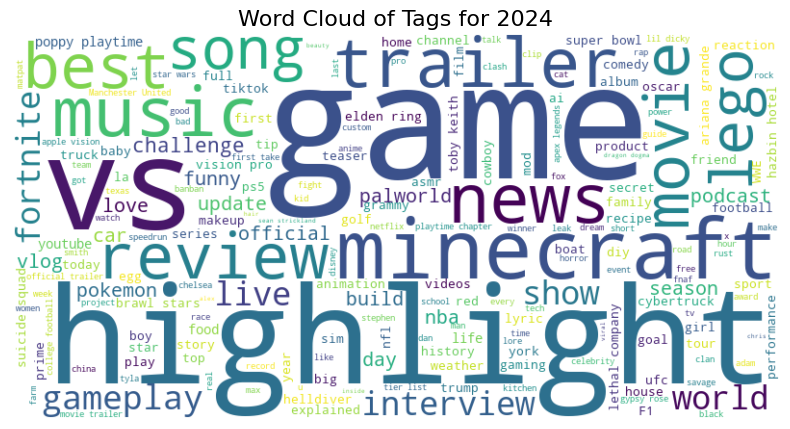

In [4]:
for year in range(2020, 2025):
    # Filter data for the year
    yearly_data = videosUS[videosUS['publish_year'] == year]
    
    # Split and clean tags
    all_tags = yearly_data['tags'].str.split('|').explode()  # Split tags by '|'
    all_tags = all_tags[all_tags != 'None']                # Remove 'None' values
    all_tags = all_tags.str.strip()                        # Strip leading/trailing whitespace
    
    # Combine tags into a single string
    tags_string = " ".join(all_tags.drop_duplicates())
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=banned_words).generate(tags_string)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Tags for {year}', fontsize=16)
    plt.show()

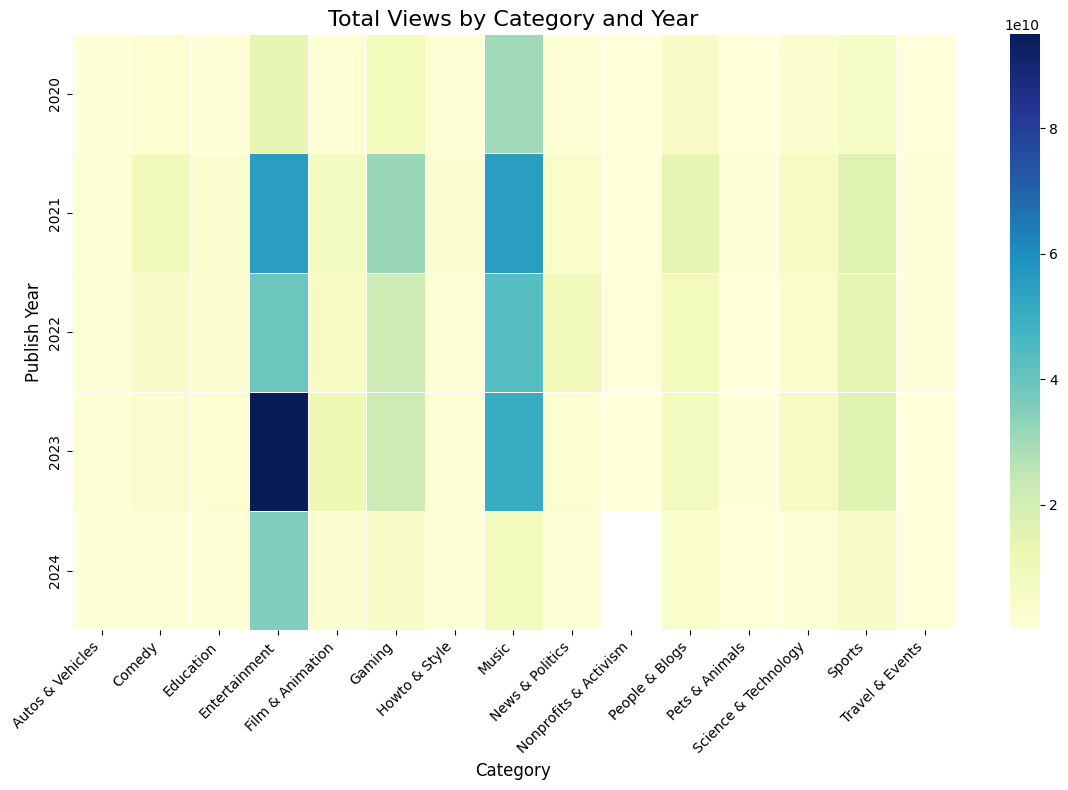

In [5]:
heatmap_data = videosUS.groupby(['publish_year', 'category_name'])['view_count'].sum().reset_index()

# Pivot the data for the heatmap
pivot_data = heatmap_data.pivot(index='publish_year', columns='category_name', values='view_count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=.5, annot=False)

# Add labels and title
plt.title('Total Views by Category and Year', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Publish Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

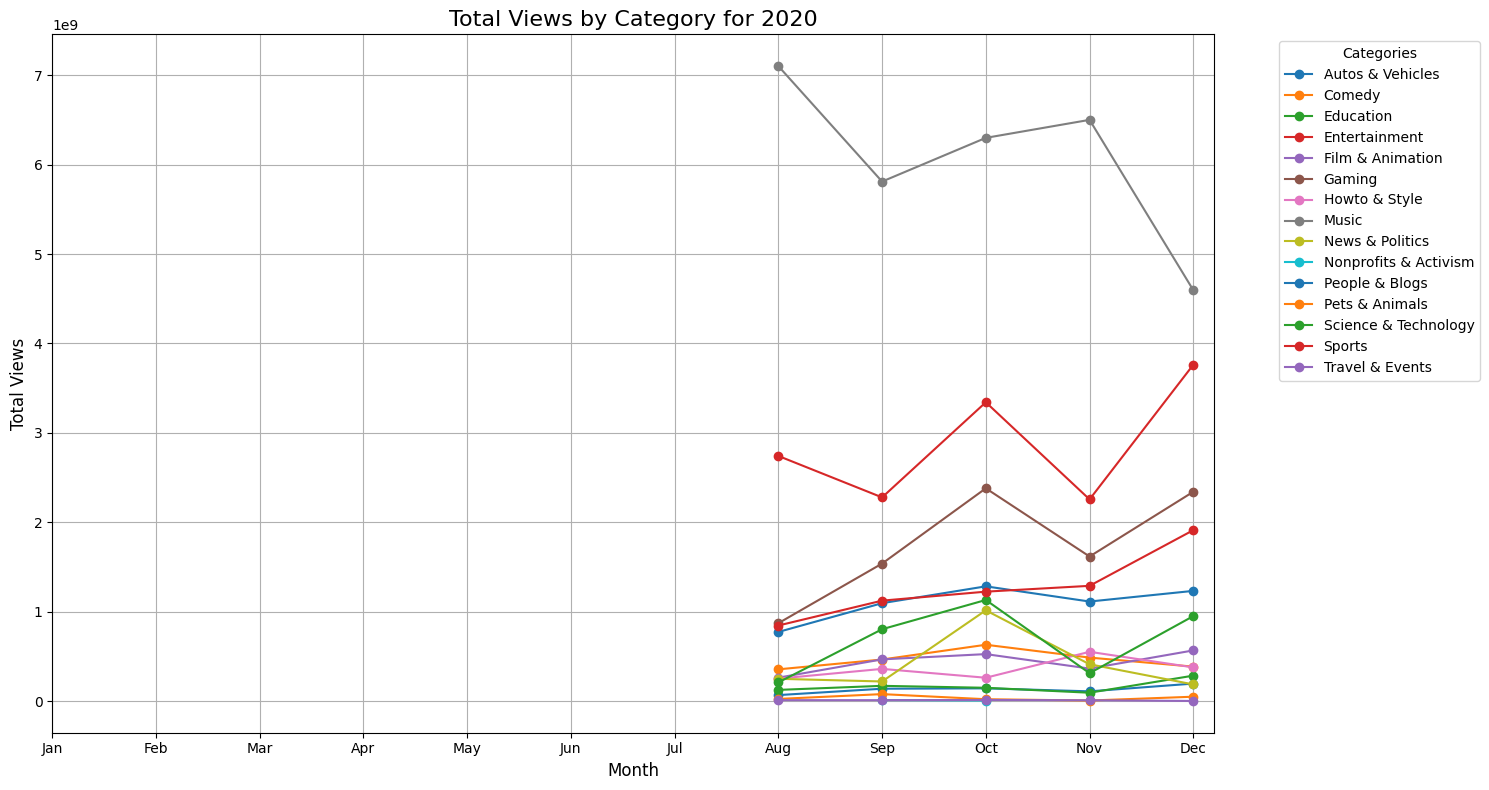

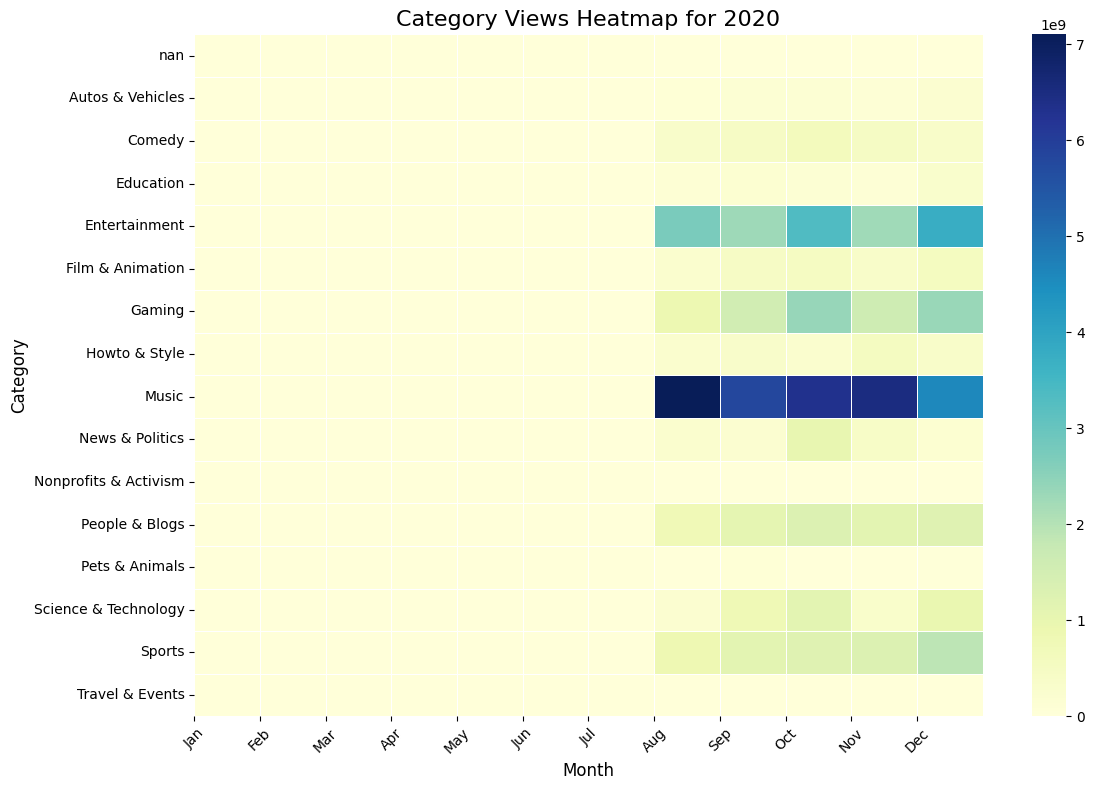

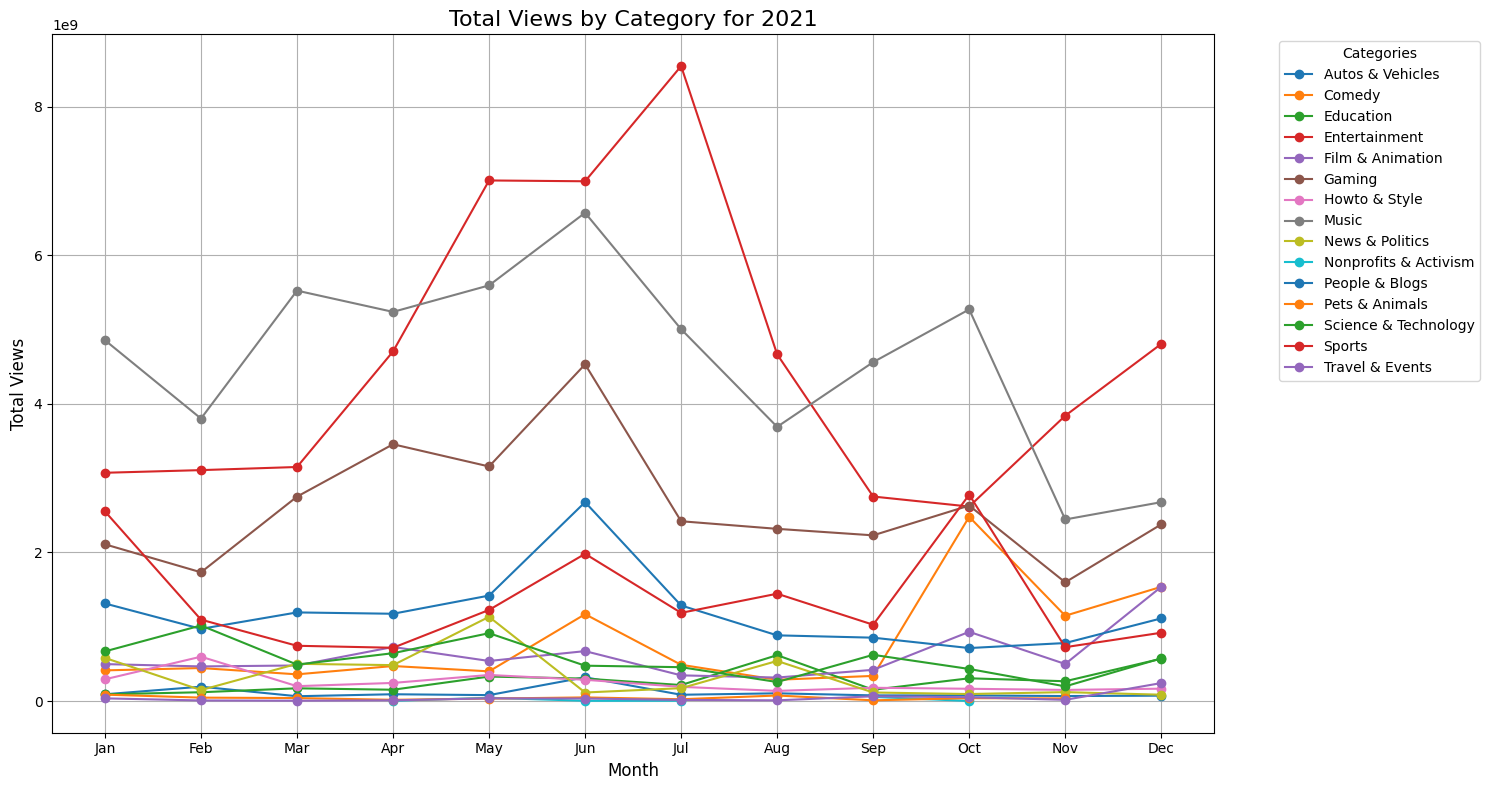

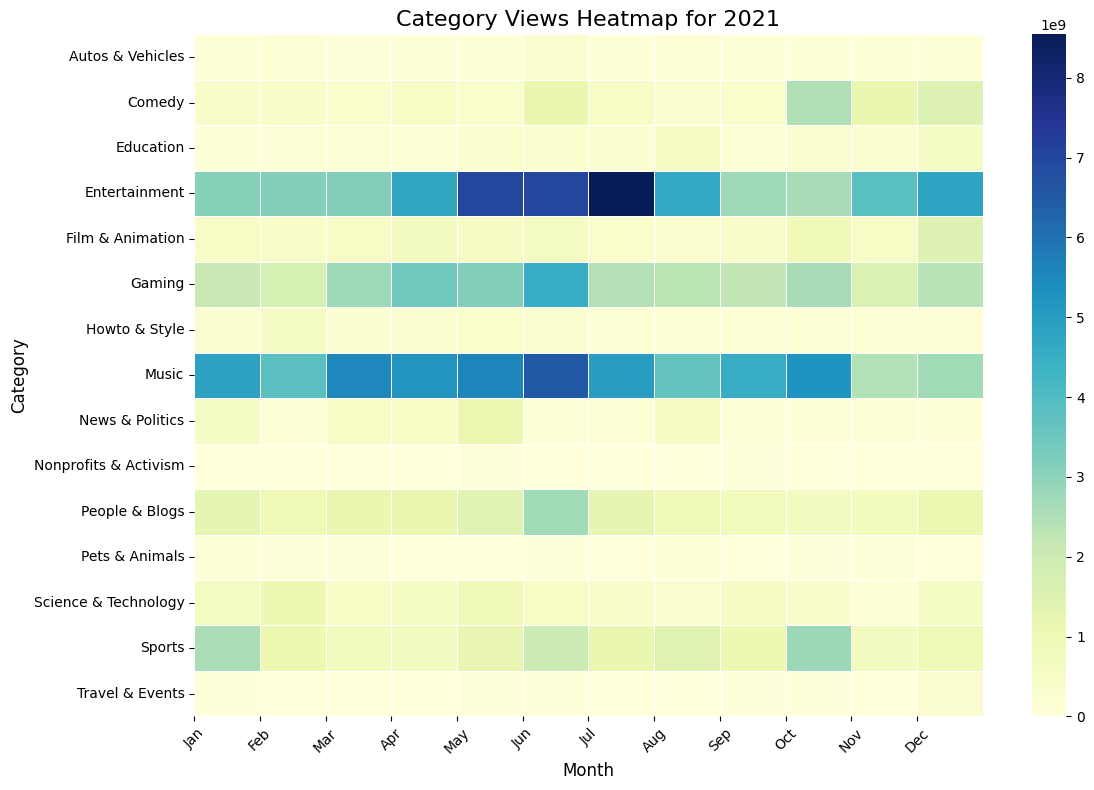

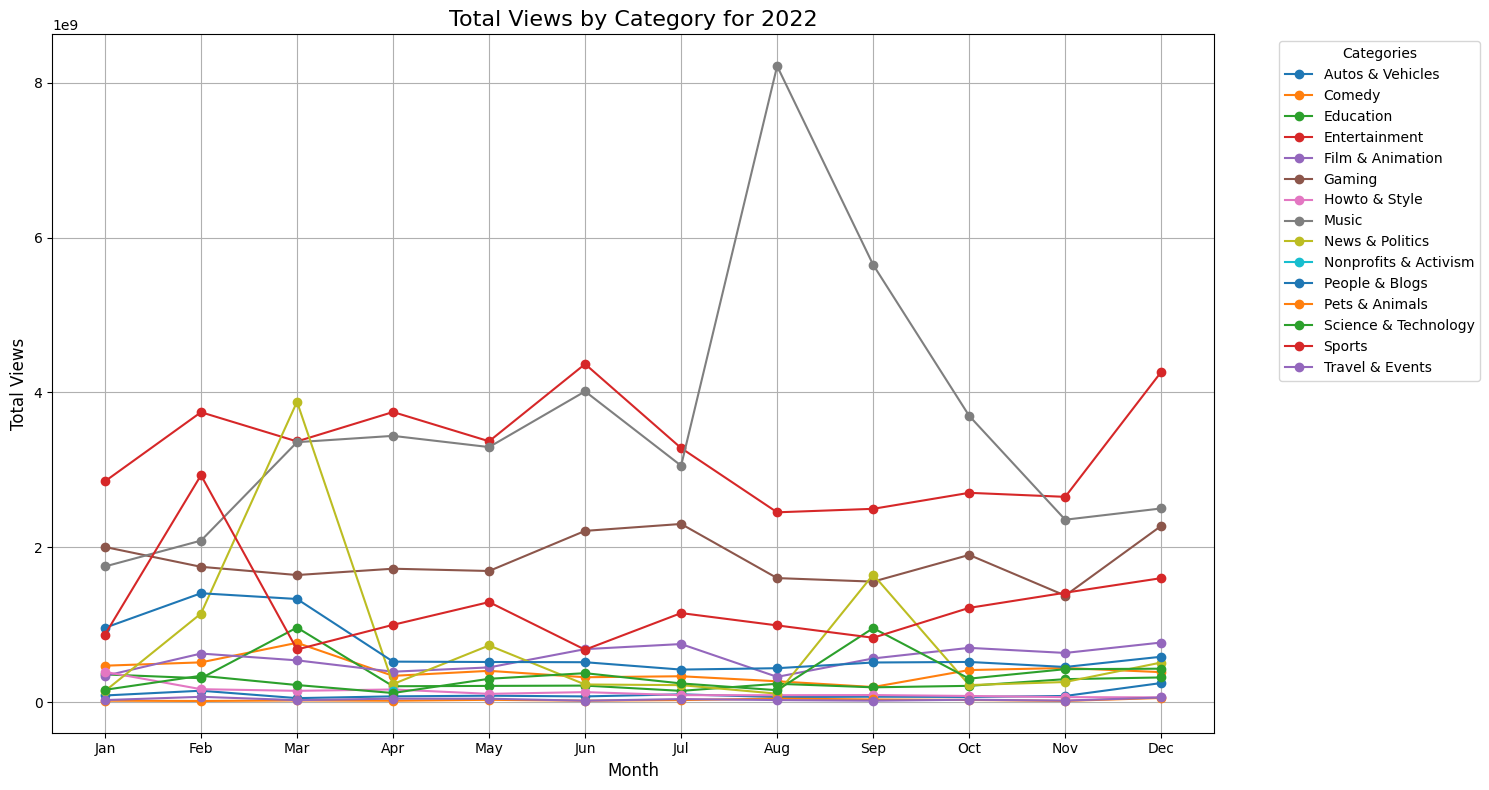

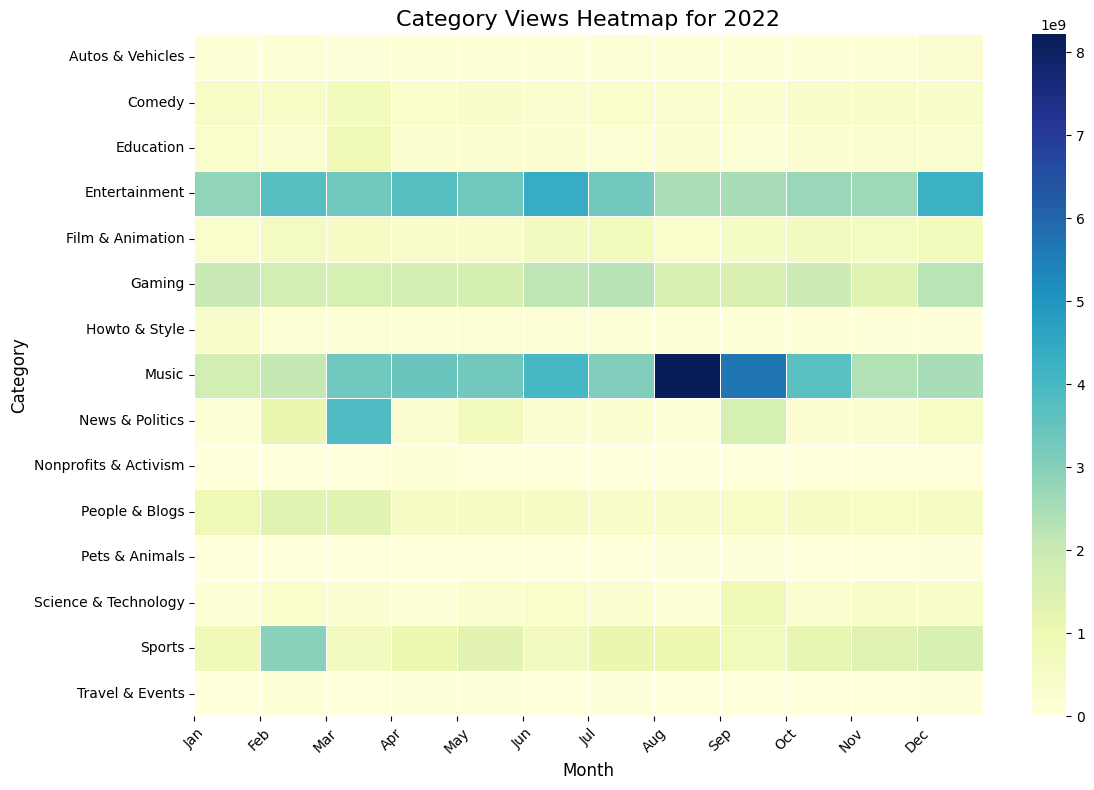

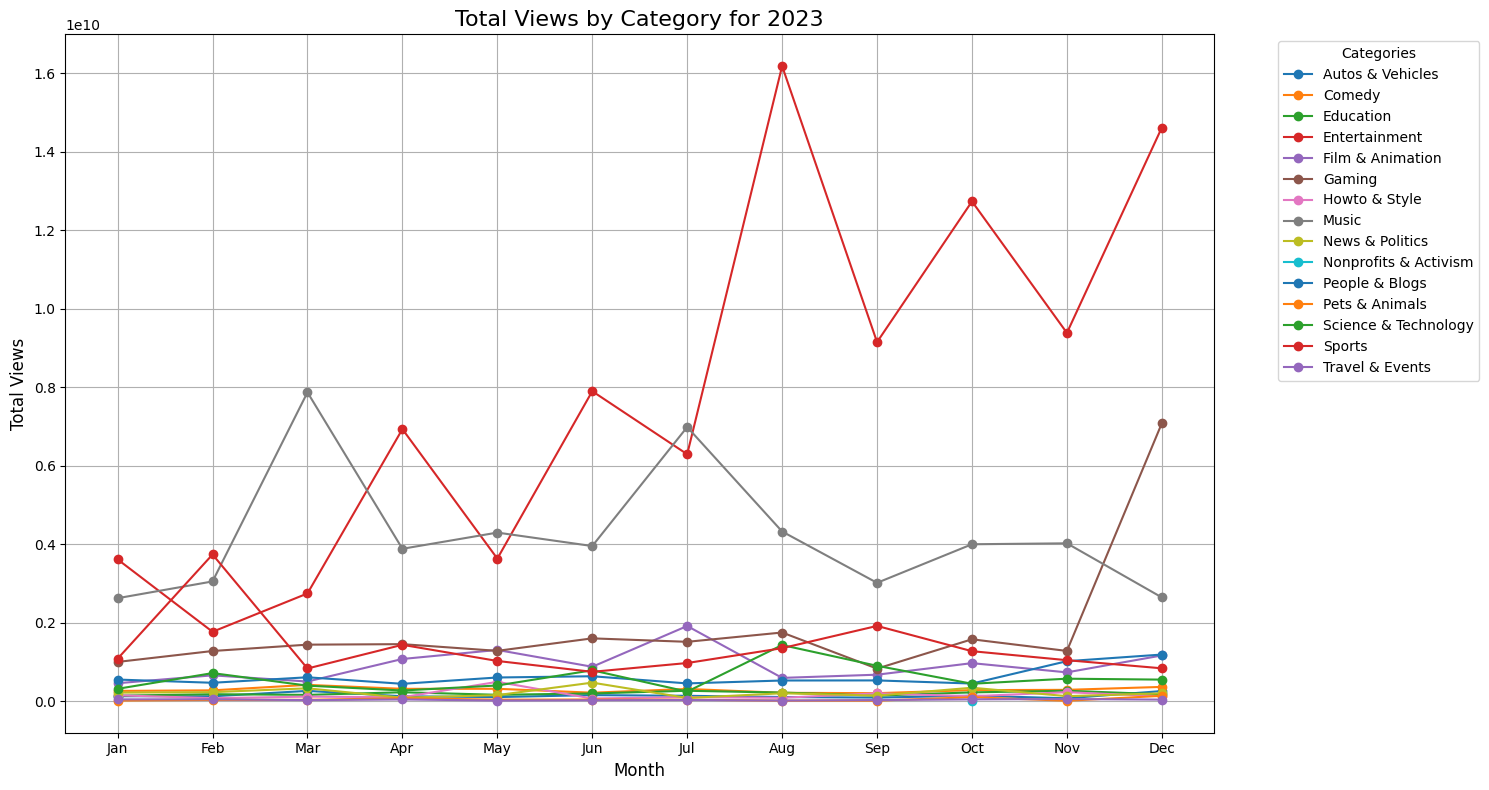

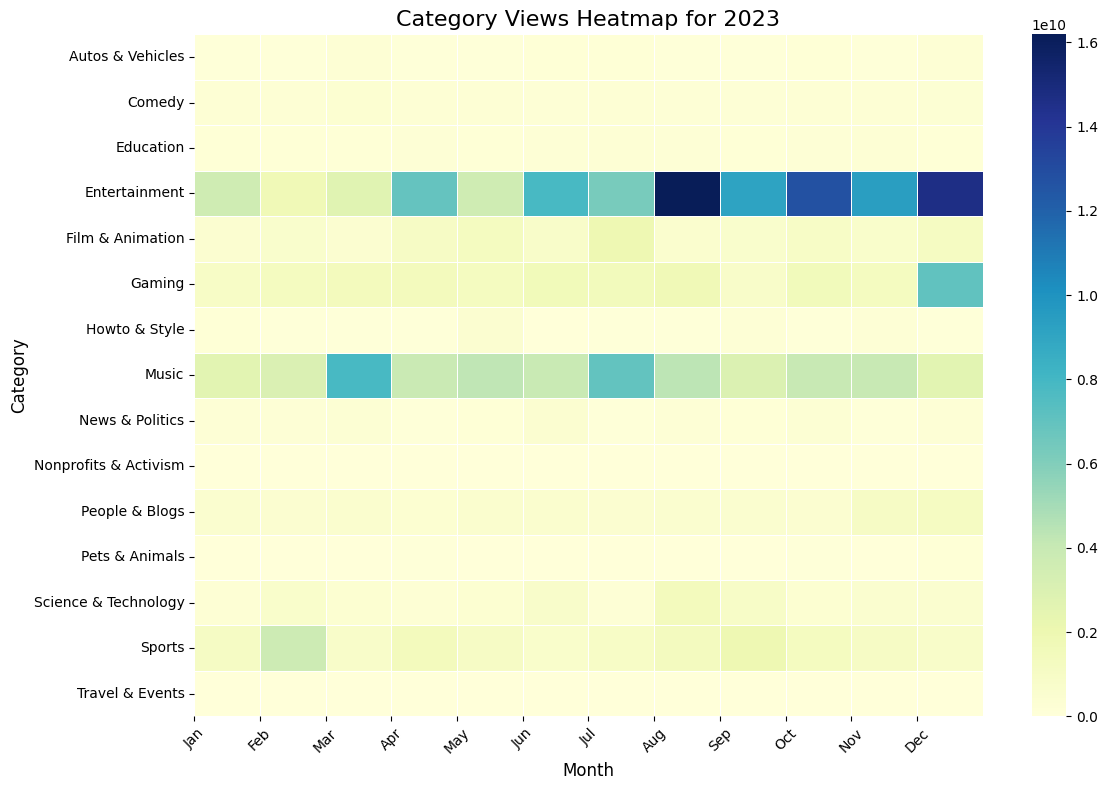

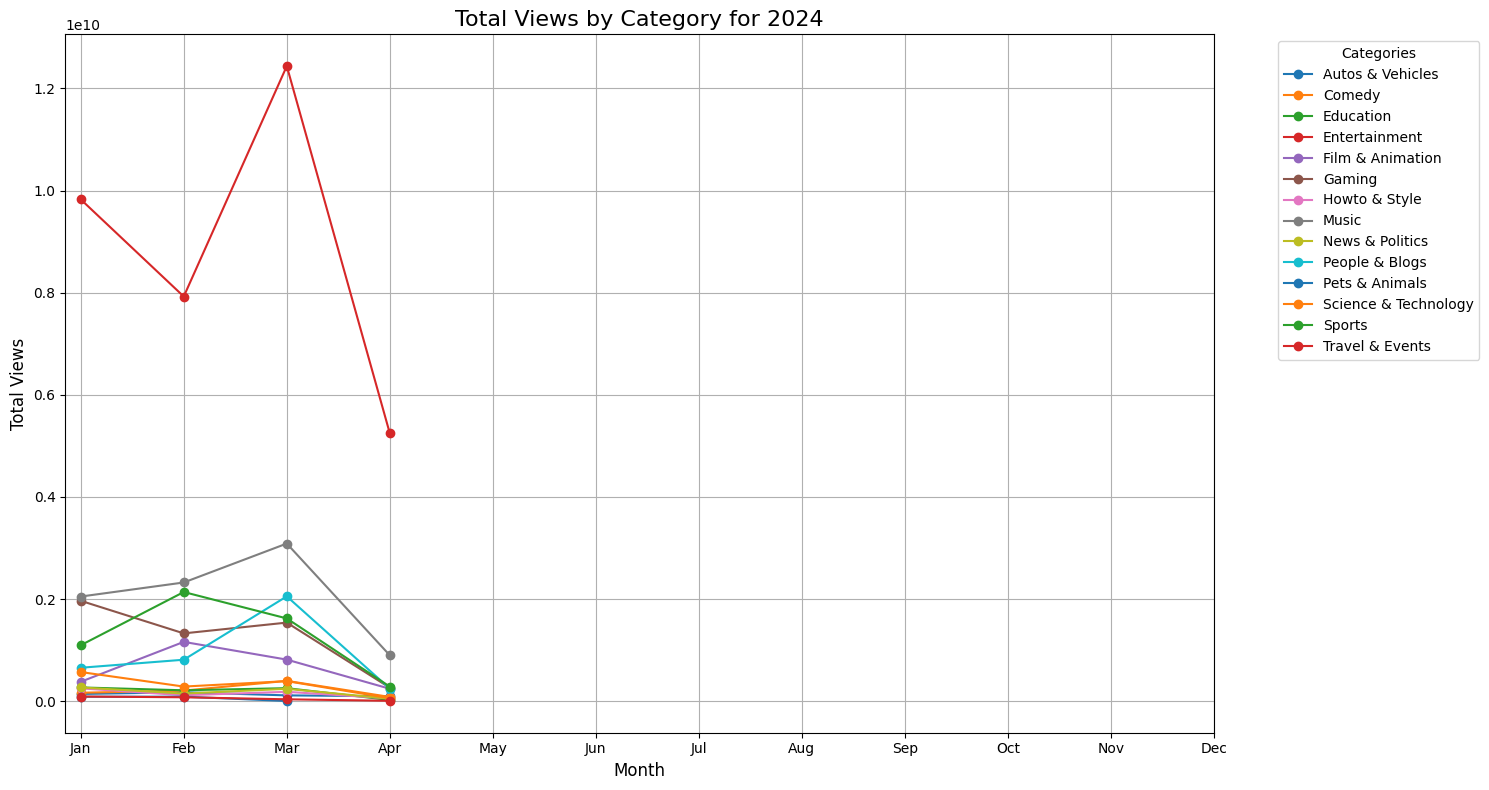

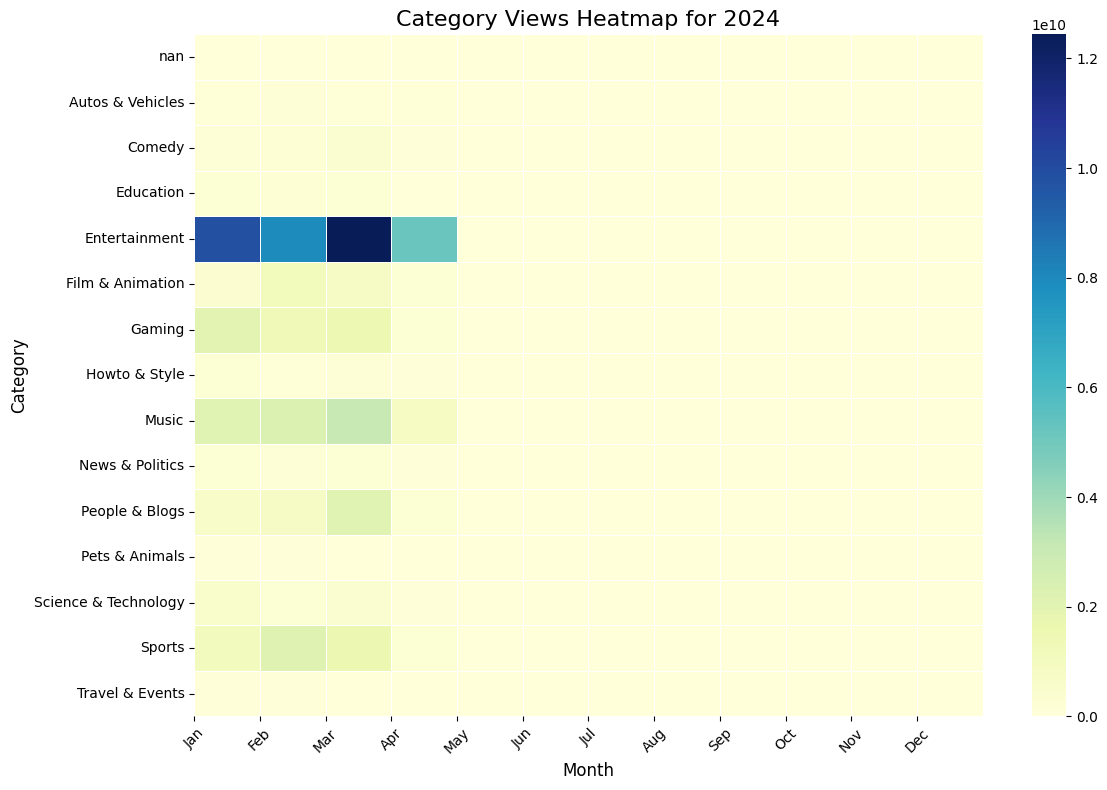

In [6]:
for year in range(2020, 2025):
    # Filter data for the year
    yearly_data = videosUS[videosUS['publish_year'] == year]
    
    # Group data by month and category
    monthly_data = yearly_data.groupby(['publish_month', 'category_name'])['view_count'].sum().reset_index()
    pivot_line = monthly_data.pivot(index='publish_month', columns='category_name', values='view_count')
    
    plt.figure(figsize=(15, 8))
    for category in pivot_line.columns:
        # Only plot months where data is available
        plt.plot(
            pivot_line.index,
            pivot_line[category],
            label=category,
            marker='o'
        )
    
    plt.title(f'Total Views by Category for {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Views', fontsize=12)
    plt.xticks(
        ticks=range(1, 13),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
    plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Heatmap: Views by category and month
    all_months = pd.DataFrame({'publish_month': range(1, 13)})
    heatmap_data = pd.merge(all_months, monthly_data, on='publish_month', how='left')
    
    # Pivot the data for the heatmap
    pivot_heatmap = heatmap_data.pivot(index='category_name', columns='publish_month', values='view_count').fillna(0)

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_heatmap, cmap="YlGnBu", annot=False, fmt=".0f", linewidths=.5)

    # Add labels and title
    plt.title(f'Category Views Heatmap for {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=45
    )
    plt.tight_layout()
    plt.show()


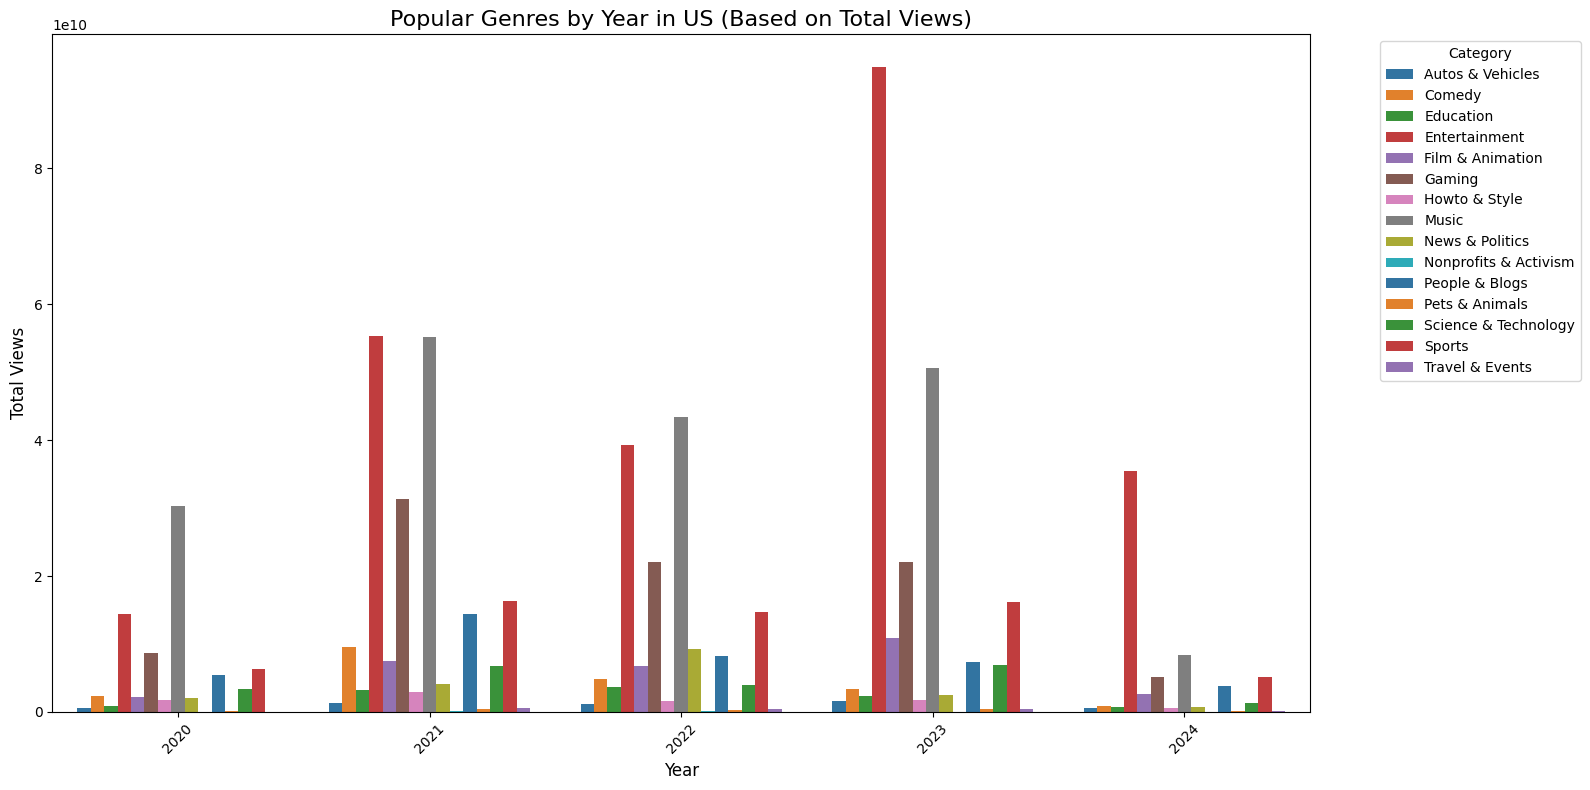

In [7]:
# Aggregate Data
category_trends = videosUS.groupby(['publish_year', 'category_name']).agg(
    total_views=('view_count', 'sum')
).reset_index()

# Normalize the views per year for better visualization (optional)
category_trends['normalized_views'] = category_trends.groupby('publish_year')['total_views'].transform(lambda x: x / x.sum() * 100)

# Plot the Data
plt.figure(figsize=(16, 8))
sns.barplot(
    data=category_trends,
    x='publish_year',
    y='total_views',
    hue='category_name',
    palette='tab10'
)

# Customize the plot
plt.title('Popular Genres by Year in US (Based on Total Views)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Views', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## UK data analysis

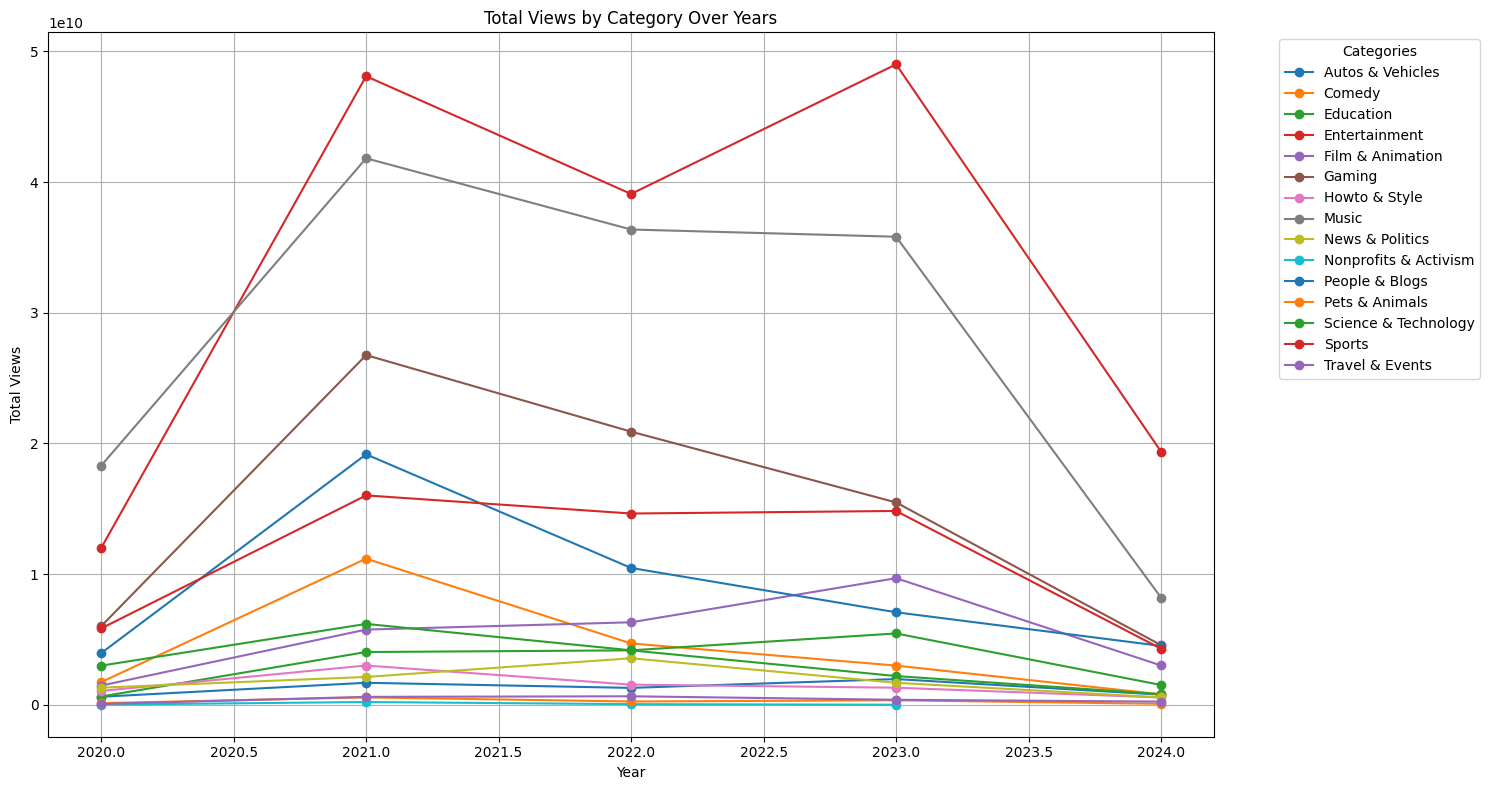

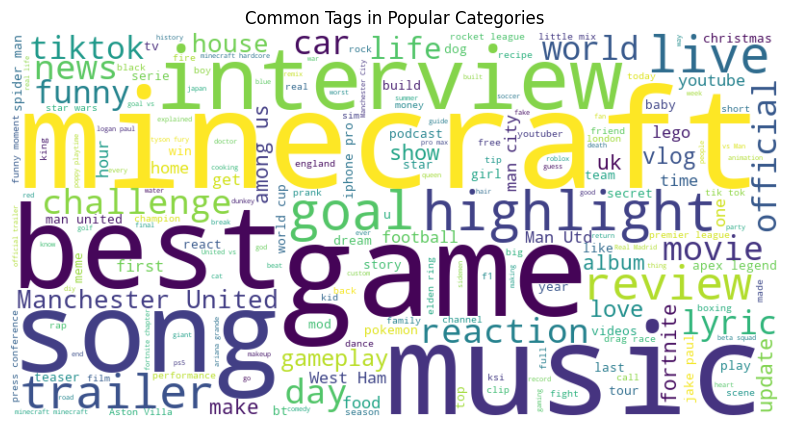

In [8]:
videosUK['trending_date'] = pd.to_datetime(videosUK['trending_date'], format='%y.%d.%m', errors='coerce')
videosUK['publishedAt'] = pd.to_datetime(videosUK['publishedAt'], errors='coerce')

# Extract Year and Month
videosUK['publish_year'] = videosUK['publishedAt'].dt.year
videosUK['publish_month'] = videosUK['publishedAt'].dt.month

# Aggregate Data
category_trends = videosUK.groupby(['publish_year', 'category_name']).agg(
    total_views=('view_count', 'sum'),
    total_likes=('likes', 'sum'),
    video_count=('video_id', 'count')
).reset_index()

# Plot Trends
pivot_data = category_trends.pivot(index='publish_year', columns='category_name', values='total_views')
pivot_data.plot(kind='line', figsize=(15, 8), marker='o')
plt.title('Total Views by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate Word Cloud for Popular Tags
banned_words = set(stopwords.words('english'))
banned_words.update({"new", "video", "V"})
videosUK['tags'] = videosUK['tags'].fillna('')  # Replace NaN with an empty string

popular_tags = videosUK['tags'].str.split('|').explode()
popular_tags = popular_tags[popular_tags != 'None']
popular_tags = popular_tags.str.strip()
popular_tags = " ".join(popular_tags.drop_duplicates())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=banned_words).generate(popular_tags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Tags in Popular Categories')
plt.show()

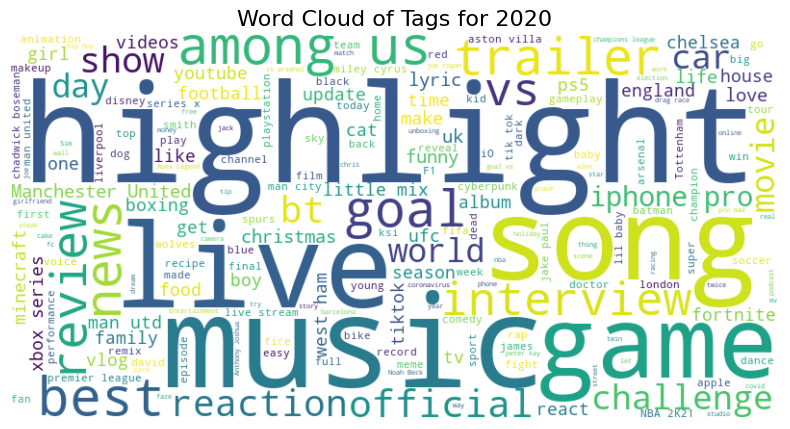

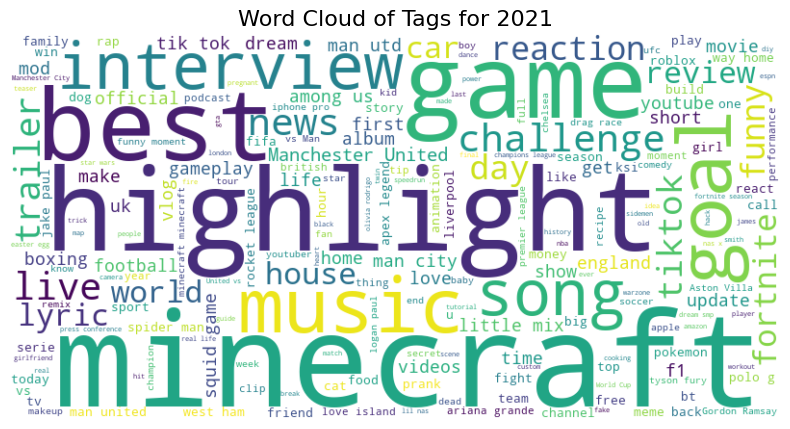

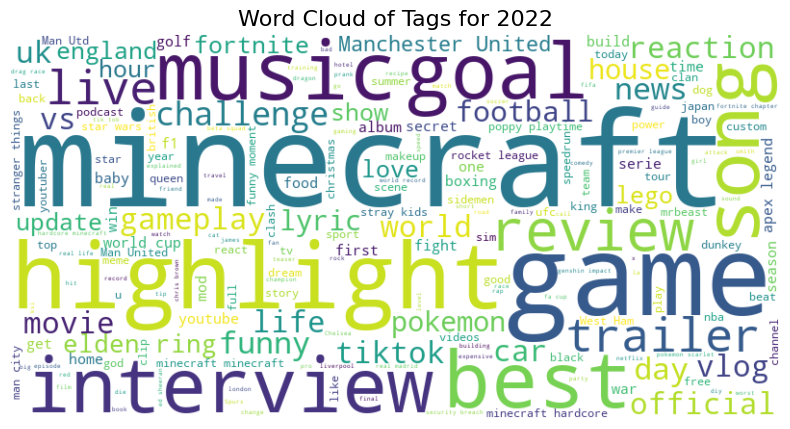

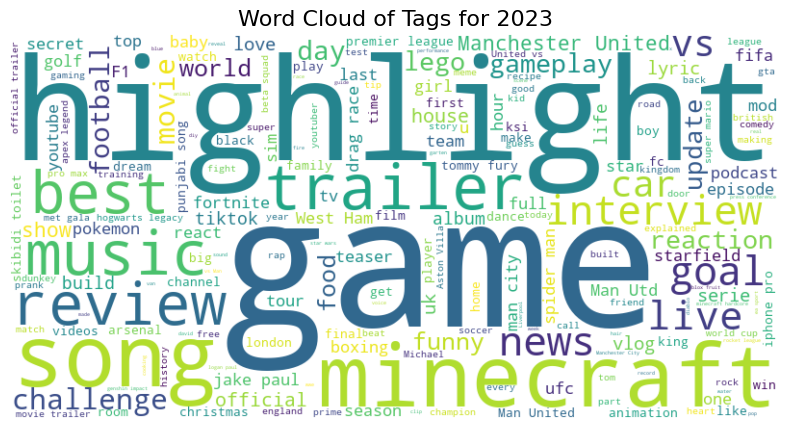

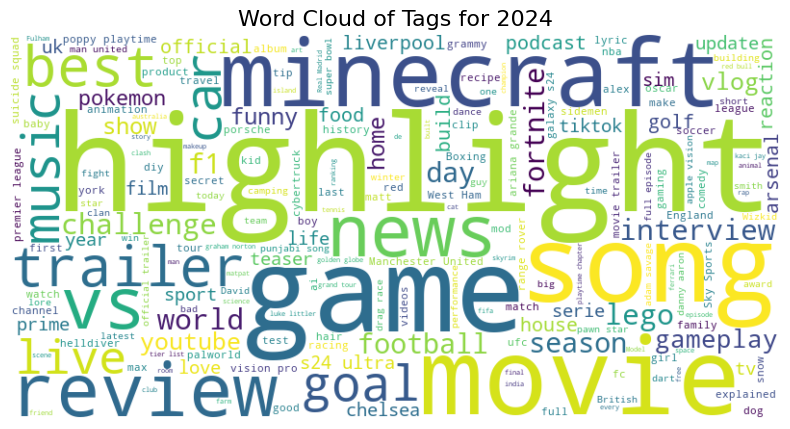

In [9]:
for year in range(2020, 2025):
    # Filter data for the year
    yearly_data = videosUK[videosUK['publish_year'] == year]
    
    # Split and clean tags
    all_tags = yearly_data['tags'].str.split('|').explode()  # Split tags by '|'
    all_tags = all_tags[all_tags != 'None']                # Remove 'None' values
    all_tags = all_tags.str.strip()                        # Strip leading/trailing whitespace
    
    # Combine tags into a single string
    tags_string = " ".join(all_tags.drop_duplicates())
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=banned_words).generate(tags_string)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Tags for {year}', fontsize=16)
    plt.show()

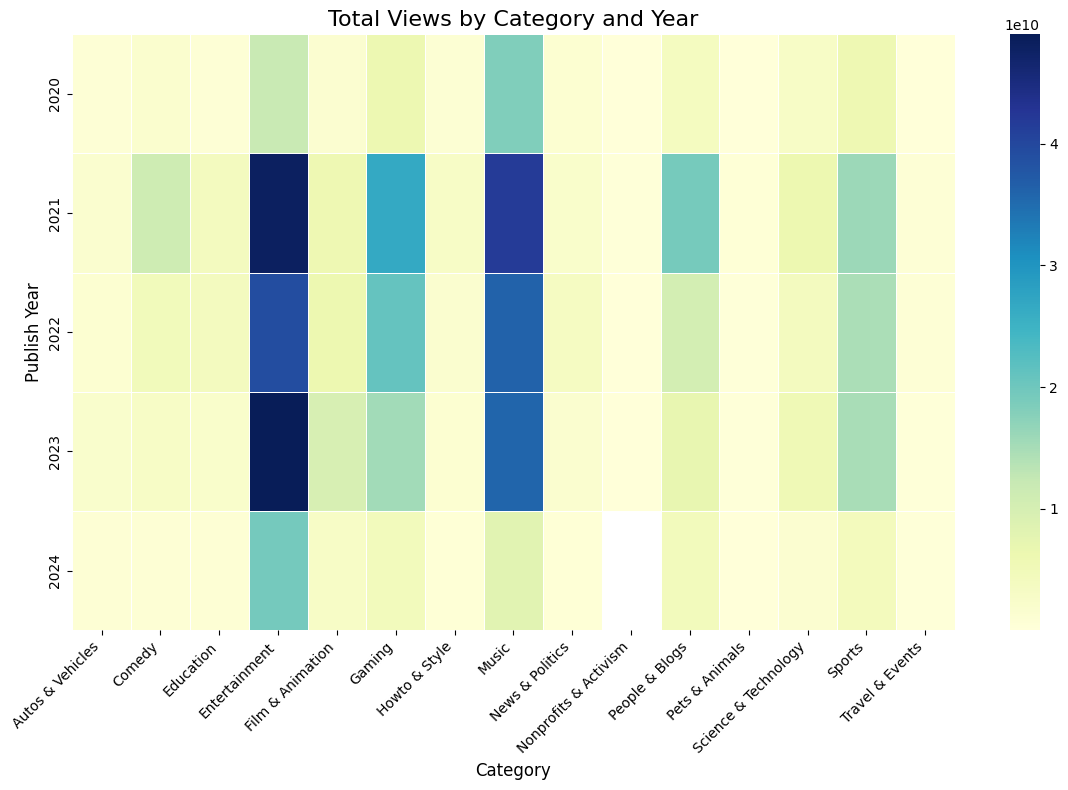

In [10]:
heatmap_data = videosUK.groupby(['publish_year', 'category_name'])['view_count'].sum().reset_index()

# Pivot the data for the heatmap
pivot_data = heatmap_data.pivot(index='publish_year', columns='category_name', values='view_count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=.5, annot=False)

# Add labels and title
plt.title('Total Views by Category and Year', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Publish Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

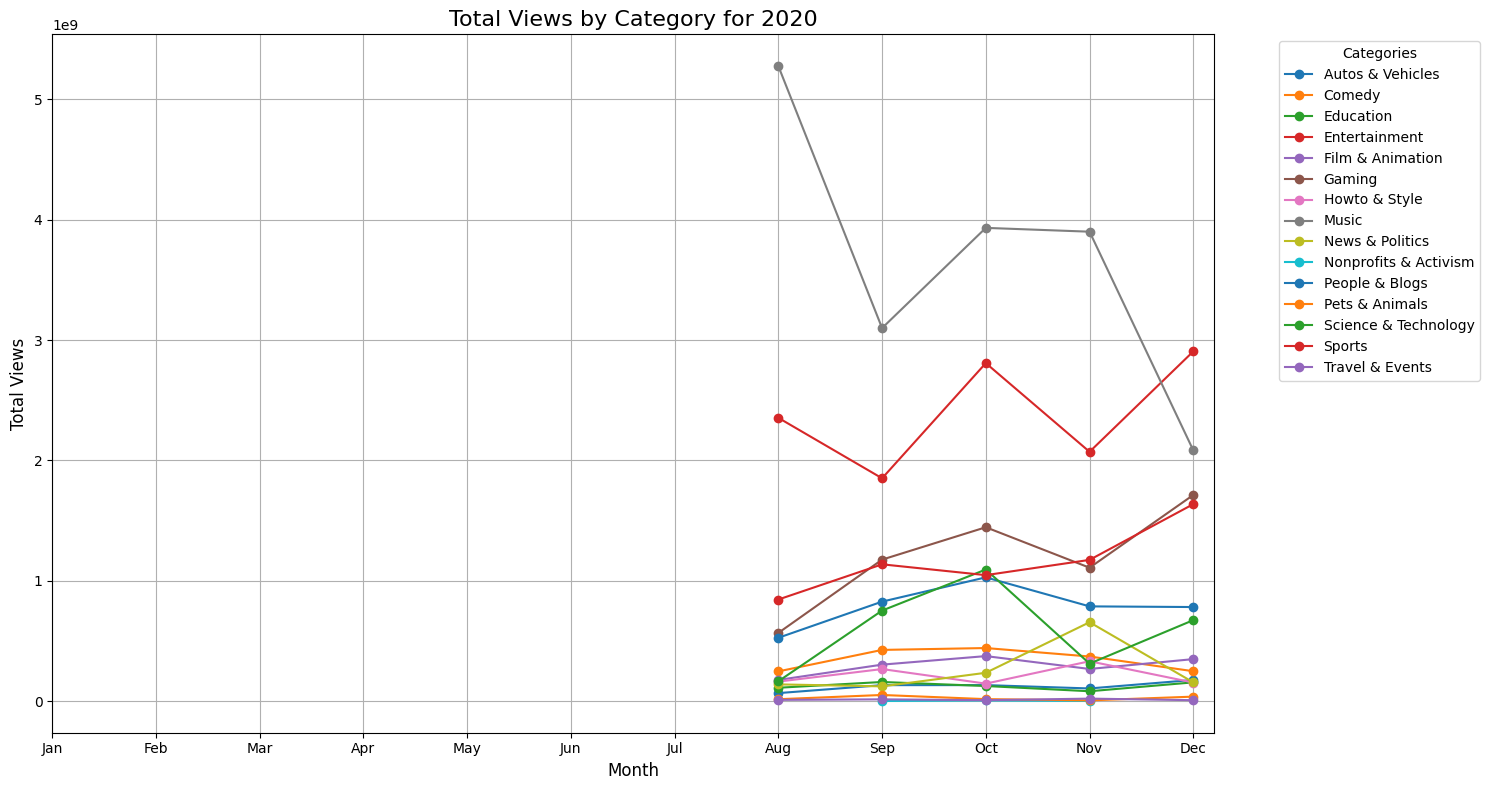

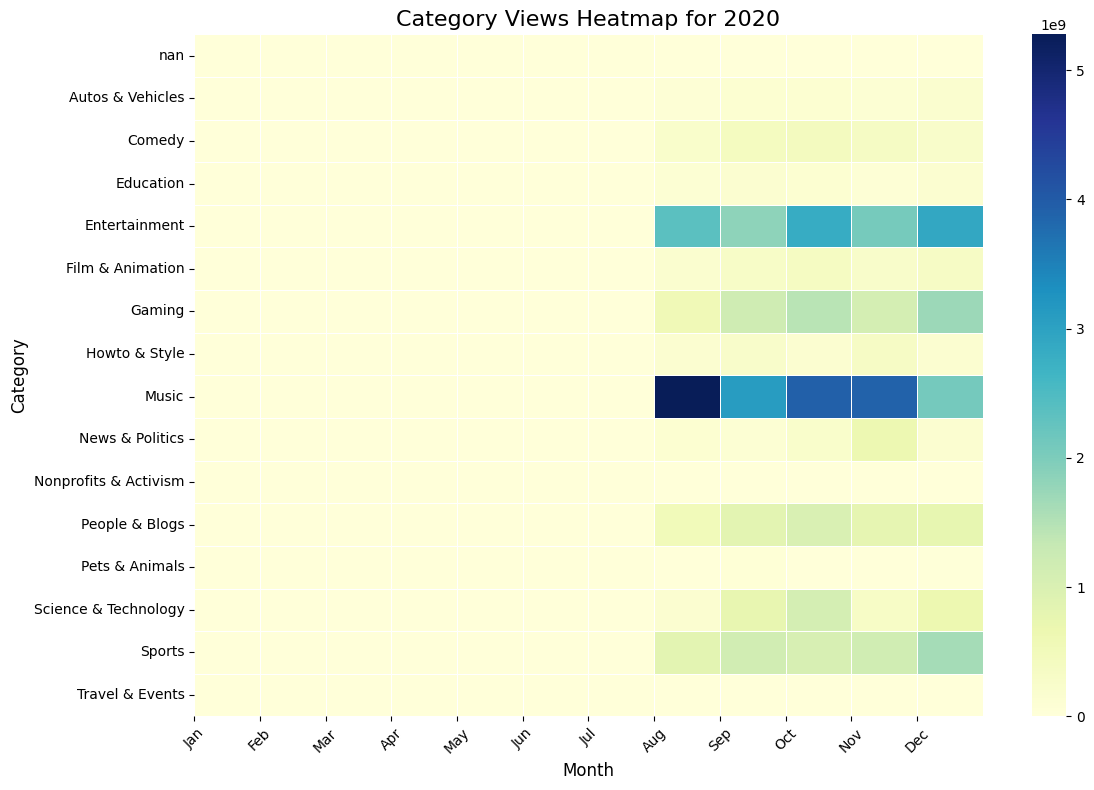

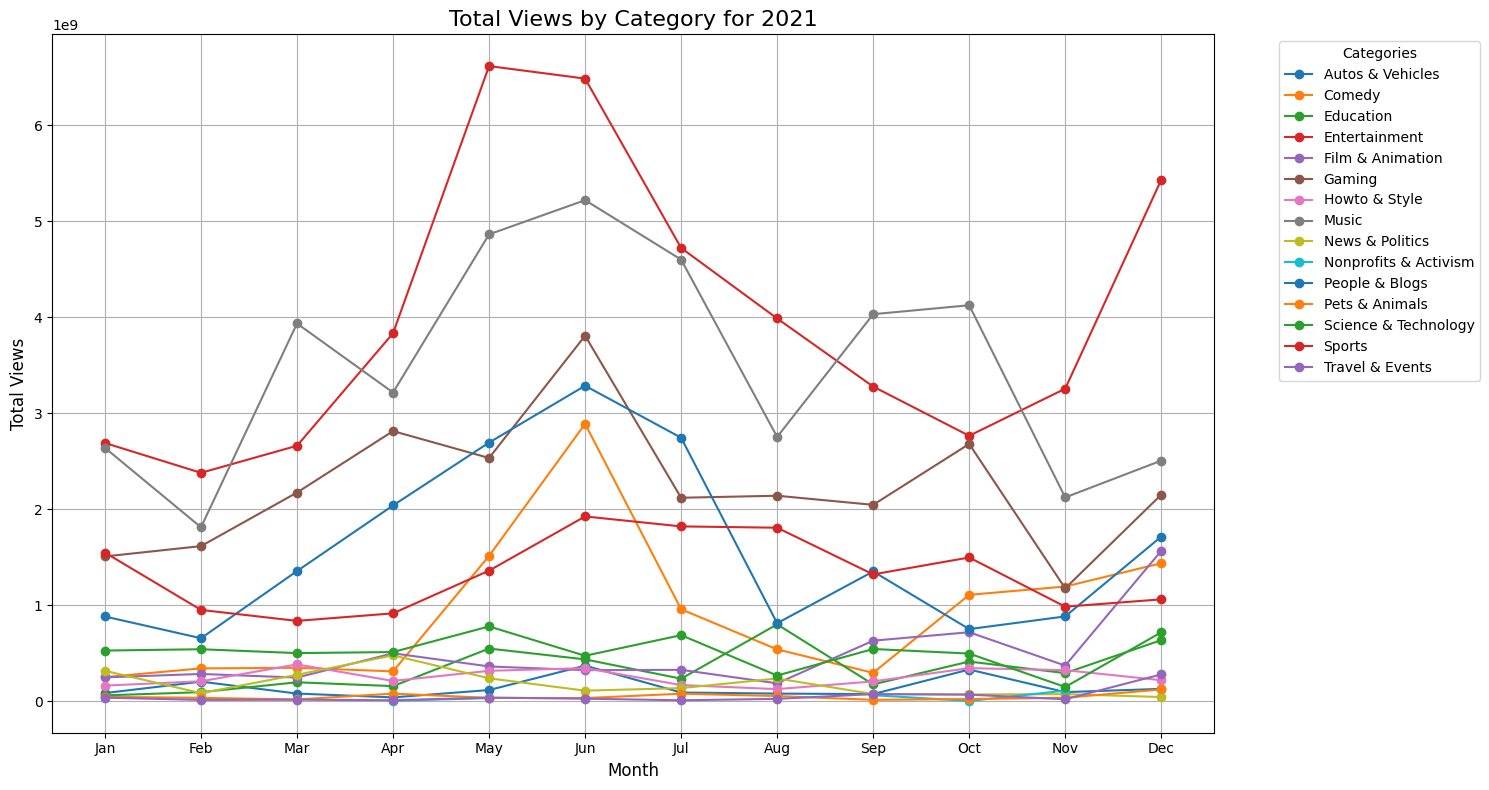

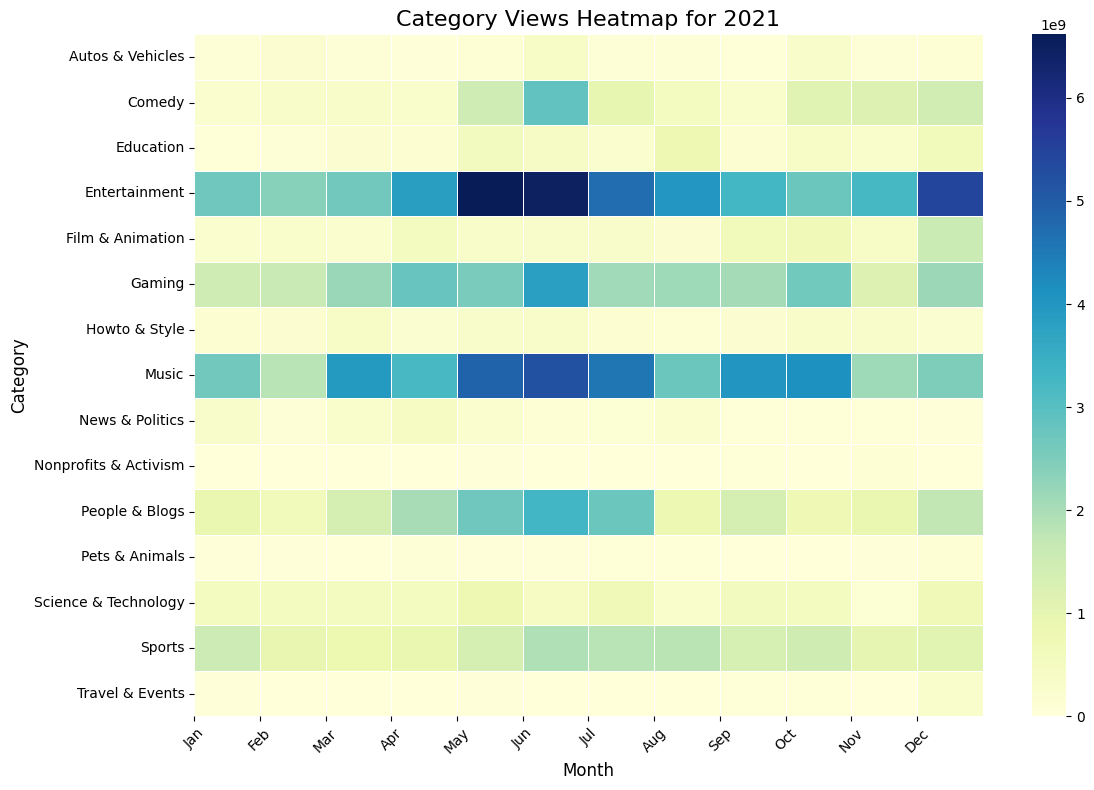

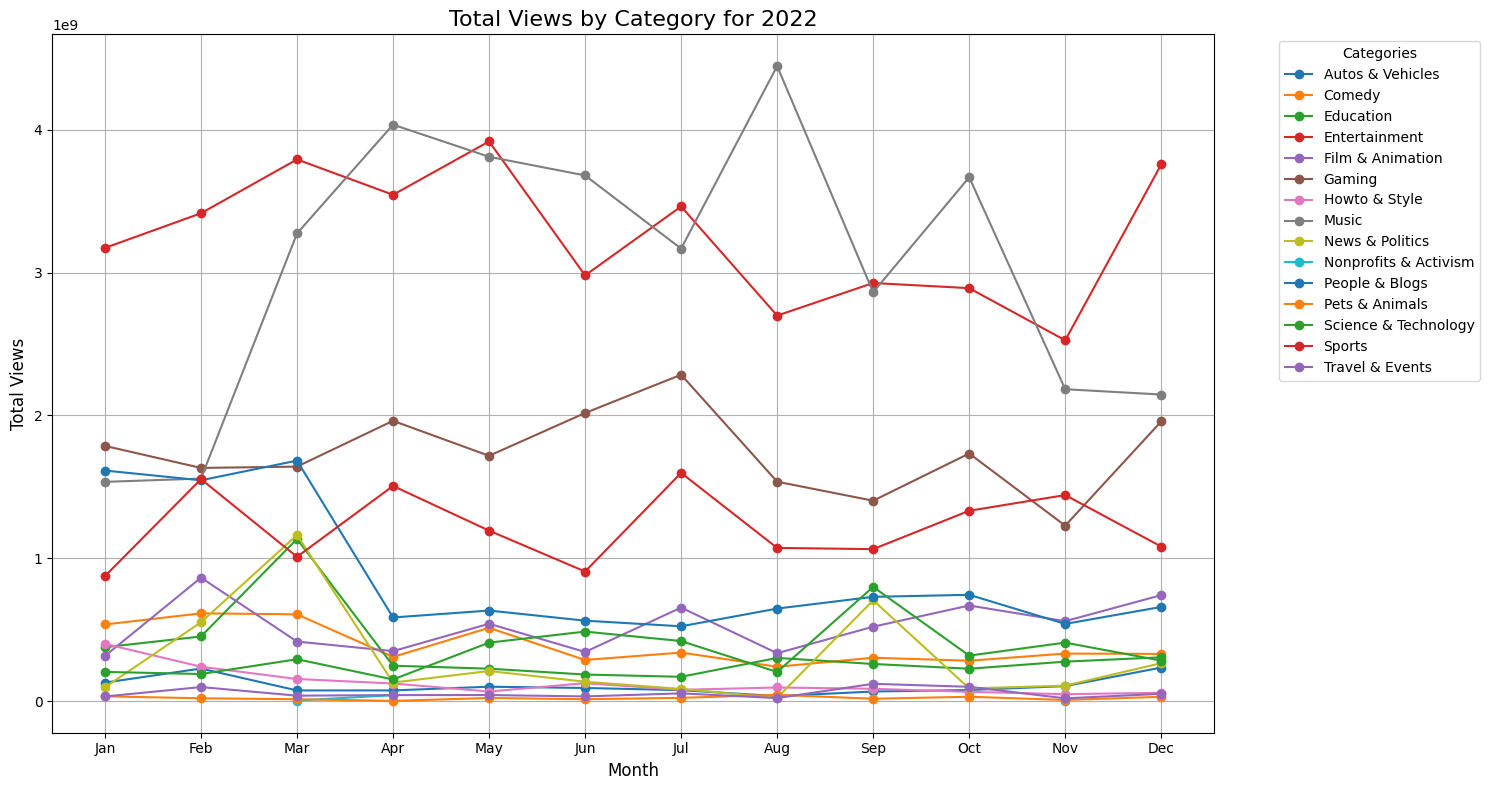

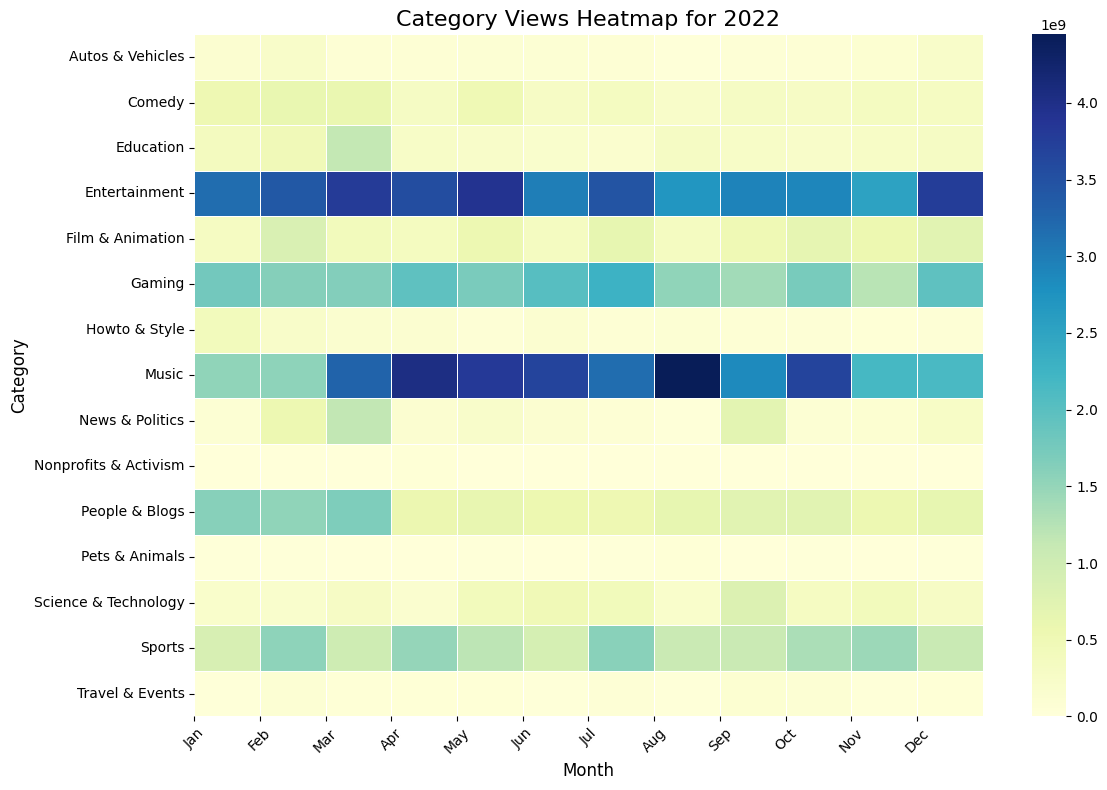

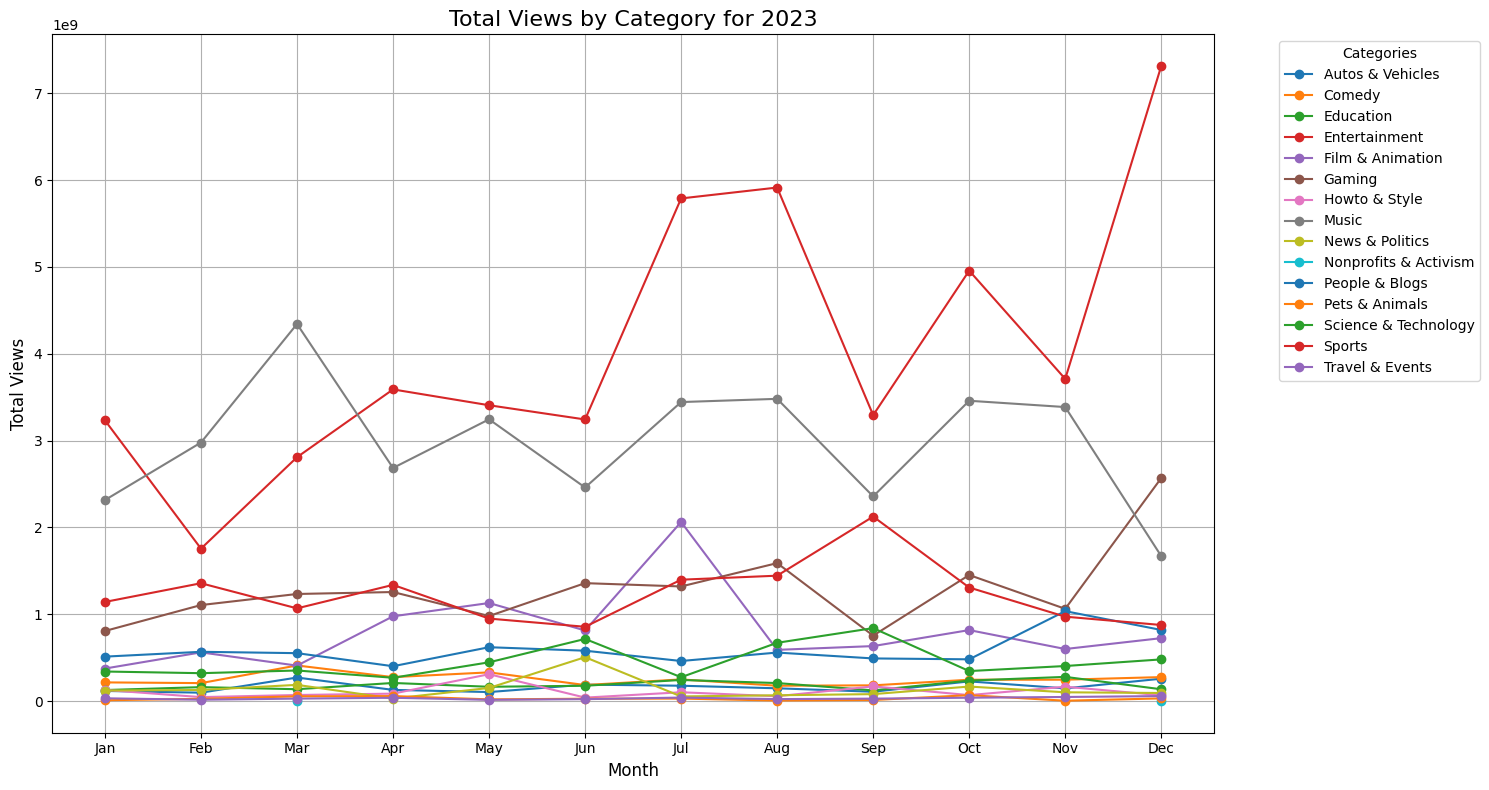

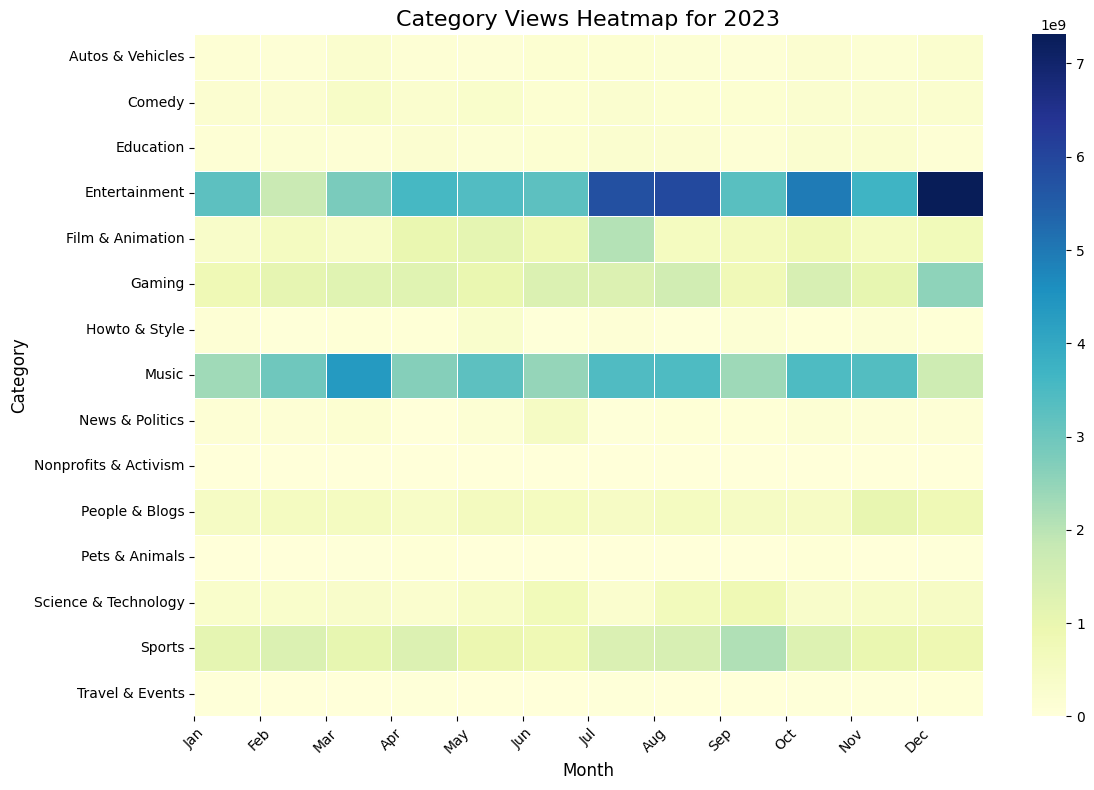

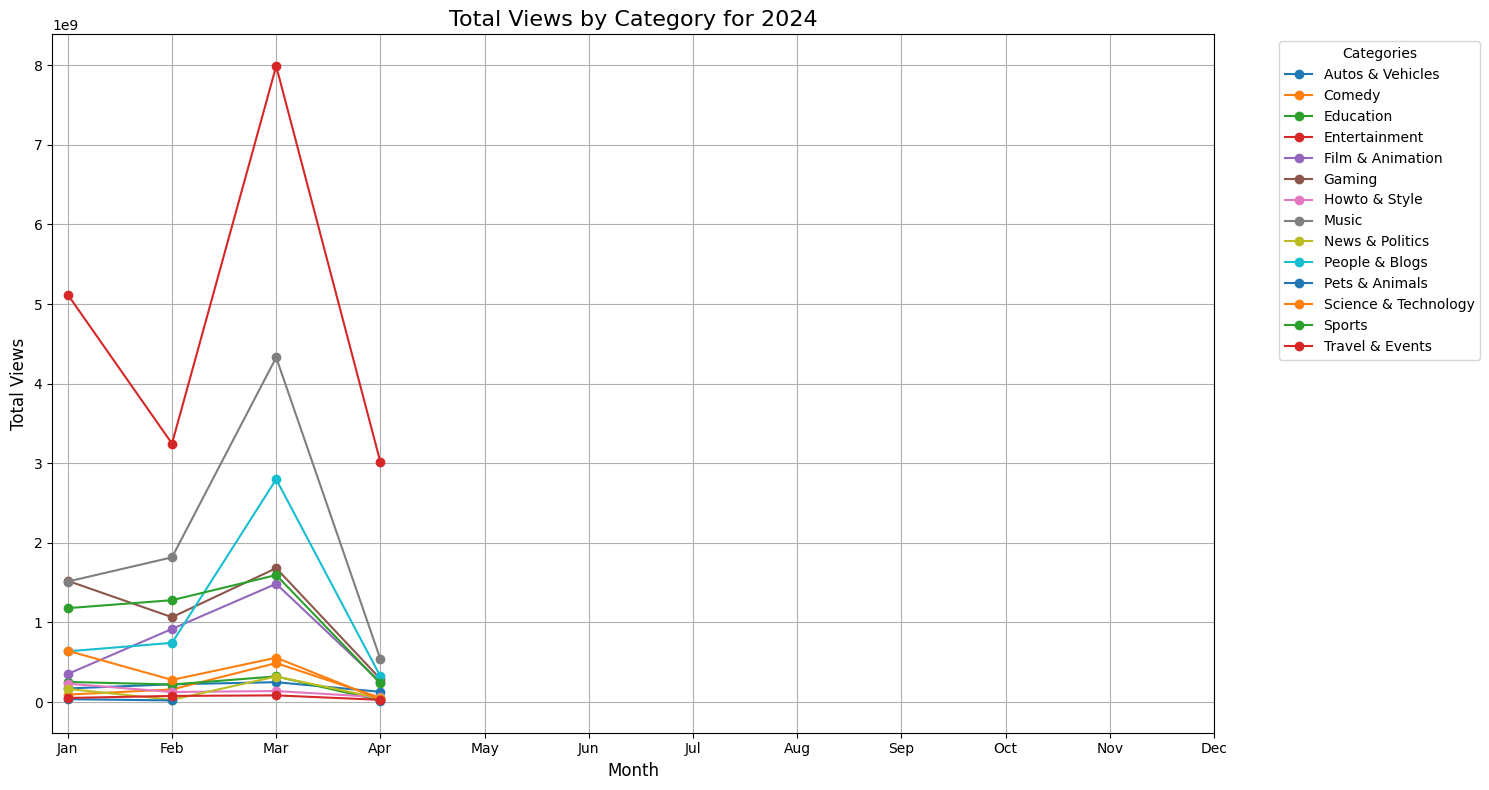

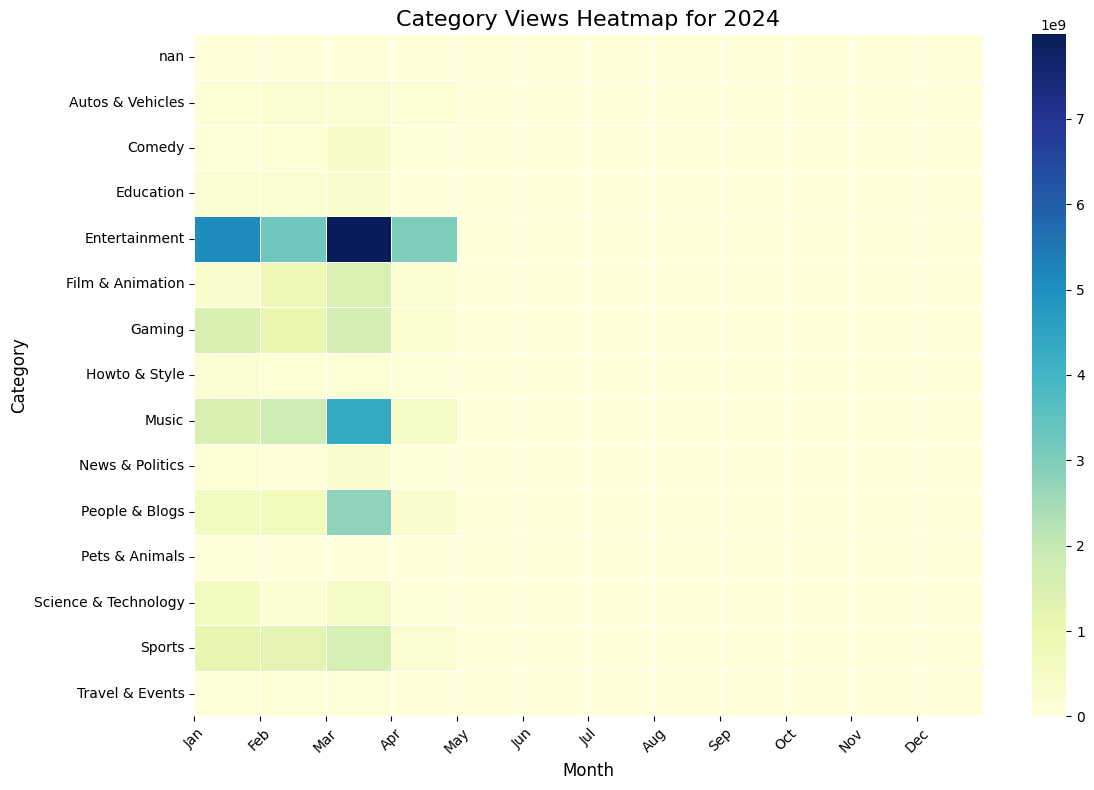

In [11]:
for year in range(2020, 2025):
    # Filter data for the year
    yearly_data = videosUK[videosUK['publish_year'] == year]
    
    # Group data by month and category
    monthly_data = yearly_data.groupby(['publish_month', 'category_name'])['view_count'].sum().reset_index()
    pivot_line = monthly_data.pivot(index='publish_month', columns='category_name', values='view_count')
    
    plt.figure(figsize=(15, 8))
    for category in pivot_line.columns:
        # Only plot months where data is available
        plt.plot(
            pivot_line.index,
            pivot_line[category],
            label=category,
            marker='o'
        )
    
    plt.title(f'Total Views by Category for {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Views', fontsize=12)
    plt.xticks(
        ticks=range(1, 13),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
    plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Heatmap: Views by category and month
    all_months = pd.DataFrame({'publish_month': range(1, 13)})
    heatmap_data = pd.merge(all_months, monthly_data, on='publish_month', how='left')
    
    # Pivot the data for the heatmap
    pivot_heatmap = heatmap_data.pivot(index='category_name', columns='publish_month', values='view_count').fillna(0)

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_heatmap, cmap="YlGnBu", annot=False, fmt=".0f", linewidths=.5)

    # Add labels and title
    plt.title(f'Category Views Heatmap for {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=45
    )
    plt.tight_layout()
    plt.show()

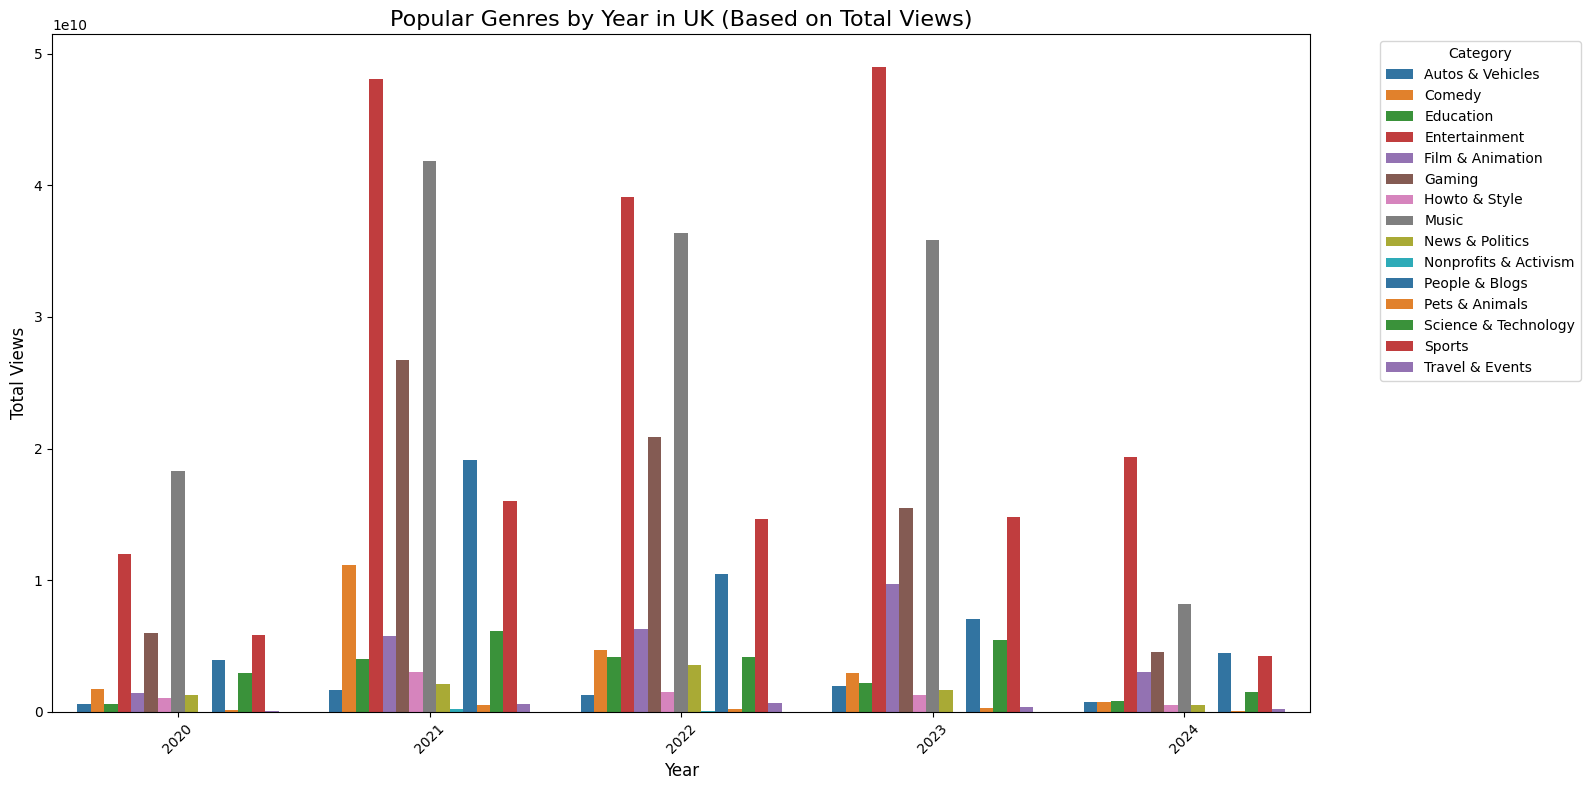

In [12]:
# Aggregate Data
category_trends = videosUK.groupby(['publish_year', 'category_name']).agg(
    total_views=('view_count', 'sum')
).reset_index()

# Normalize the views per year for better visualization (optional)
category_trends['normalized_views'] = category_trends.groupby('publish_year')['total_views'].transform(lambda x: x / x.sum() * 100)

# Plot the Data
plt.figure(figsize=(16, 8))
sns.barplot(
    data=category_trends,
    x='publish_year',
    y='total_views',
    hue='category_name',
    palette='tab10'
)

# Customize the plot
plt.title('Popular Genres by Year in UK (Based on Total Views)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Views', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()